# Attention Mechanism

## 1. seq2seq의 문제점?
- 1) 고정된 크기의 vector에 모든 정보 압축 -> 정보 손실 불가피
- 2) 길어진 문장, Vanishing Gradient 문제

이를 해결하기 위한 기법인 "Attention"

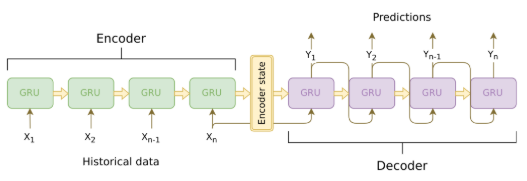

## 2. Attention Function
- 기본 아이디어 : Decoder에서 단어를 예측하여 출력하는 매 시점마다, Encoder의 전체 입력 문장을 다시 참고!
- 모든 단어를 동일한 비율로 참고 X 
- 해당 시점에서 예측해야 할 단어와 연관 있는 입력 단어에 보다 집중!

### KEY-VALUE 방식 이용

In [1]:
dict = {"2017" : "Transformer", "2018" : "BERT"}

In [2]:
dict.keys()

dict_keys(['2017', '2018'])

In [3]:
dict.values()

dict_values(['Transformer', 'BERT'])

#### Attention(Q, K, V) = Attention Value

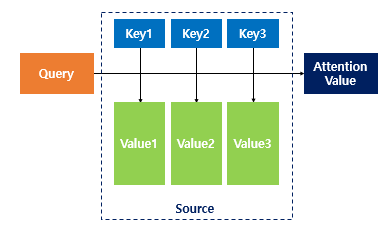

1.주어진 Query에 대해서, 모든 Key와의 유사도를 구한다

2.구한 유사도와, (Key와 매핑되어있는) Value를 함께 고려하여 값을 계산

3.Value값을 모두 더해서 Return

### Q,K,V
- Q : t시점의 Decoder cell에서의 hidden state
- K & V : 모든 시점의 Encoder에서의 hidden state

## 3. Dot-Product Attention
- 가장 간단한 Attention기법

### Example

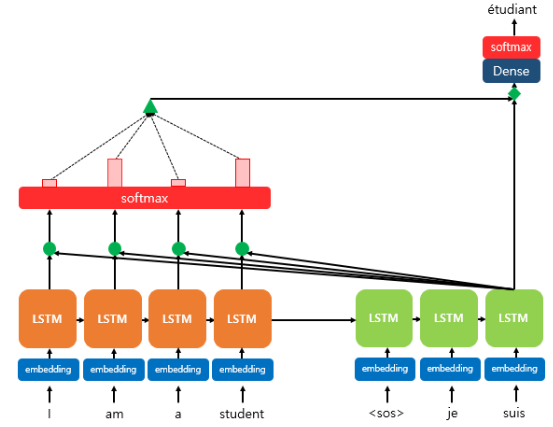

위 그림에서 Decoder의 세 번째 LSTM셀은, 출력 단어를 예측하기 위해 Encoder의 모든 input 단어들을 다시 참고함! 

그 참고하는 정도는, input 단어별로 모두 다름. 그 정도는, Encoder에서 나온 모든 출력값들에 따라 정해진다 (위 그림에서의 softmax 함수 결과값)

이렇게 각기 다른 input 단어들의 영향도를 고려한 값을 모두 더함. 그렇게 나온 하나의 값은 Decoder로 전송됨!

## Algorithm

복습 : Decoder값이 출력값을 낼 때, 참고하는 2개의 값은...
- 1)  "t-1시점의 hidden state"
- 2) "t-1시점에서 출력된 output"

attention mechanism에서는 또 하나의 값을 필요로 함
- 3) Attention value ( at )

## Attention Value 구하는 3 STEP

#### 순서 1) Attention Score 구하기
#### 순서 2) Softmax 통해 Attention Distribution 구하기
#### 순서 3) Attention Value 구하기
#### 순서 4) Attention Value와 Decoder의 t시점의 hidden state와 연결

### 1) Attention Score 구하기

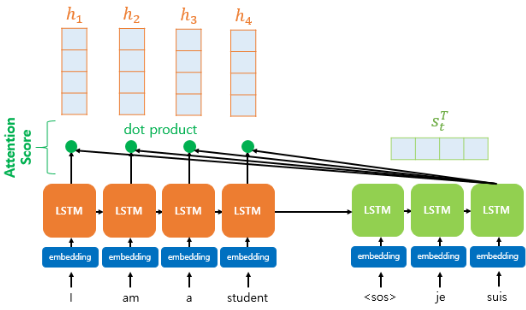

**Attention Score** : 

현재 Decoder 시점 t에서 단어를 예측하기 위해, Encoder의 모든 hidden state(=h(i))가 Decoder의 현 시점 hidden state(=s(t))와 얼마나 유사한지 나타내는 score

( dot product(내적)을 통해 구함 )

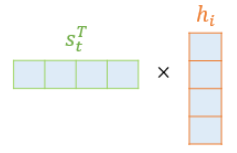

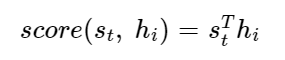

e(t) : s(t)와, Encoder의 모든 hidden state의 attention score 모음

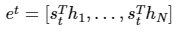

### 2) Softmax 통해 Attention Distribution 구하기

attention score의 모음값인 e(t)에 Softmax 함수를 적용한 결과! 이를 Attention Distribution이라 한다

softmax함수를 통해 나온 값은 Attention Weight라고 한다

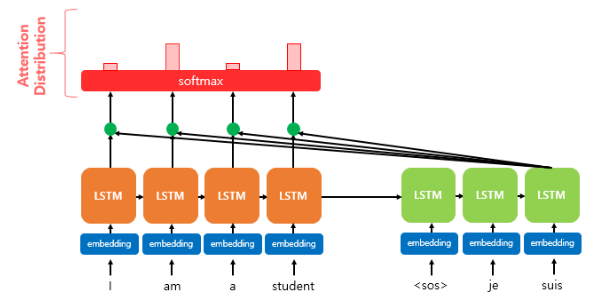

위 예시에서는, I, am, a, student의 Attention Weight는 각각 0.1, 0.4, 0.1, 0.4

현 시점(Decoder의 세 번째 cell)에서는, input 단어들을 다음과 같은 weight로 참고하여 output을 낸다

 Decoder시점 t에서의 Attention Weight의 모음값인 Attention Distribution을 a(t)라하면, 다음과 같은 식이 나온다

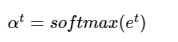

### 3) Attention Value 구하기
- 각 Encoder의 Attention Weight와 Hidden stat를 가중합!

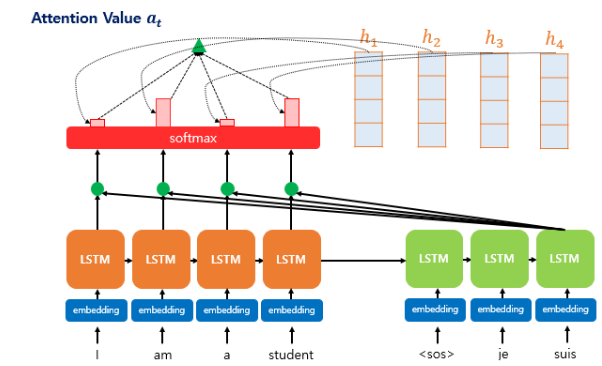

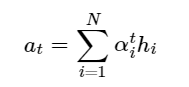

위 Attention Value( a(t) )는 Encoder의 문맥을 담고 있으므로, Context Vector라고도 부름!

( seq2seq의 context vector : Encoder의 마지막 hidden state )

### 4) Attention Value와 Decoder의 t시점의 hidden state와 연결

앞 단계 3)에서 구한 a(t)를 s(t)와 concatenate하여 하나의 벡터로 만듬! ( = v(t) )

이 v(t)는, Decoder가 매 hidden state에서 예측할때 입력으로 들어감

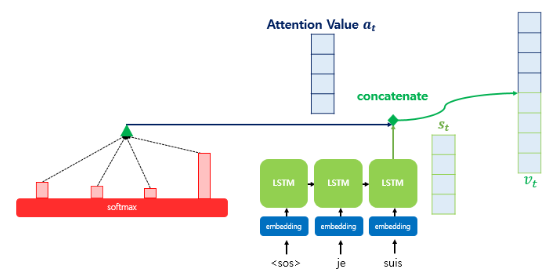

## 4. 다양한 종류의 Attention 

attention score을 구하는 데 있어서 다양한 방법이 있다

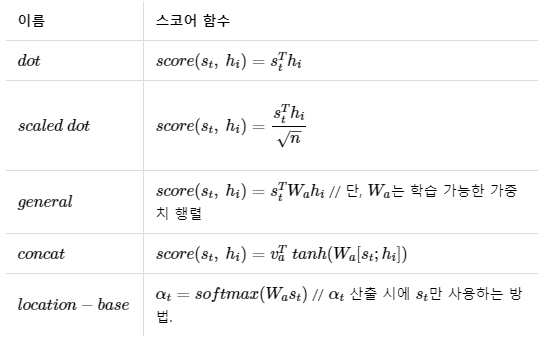